# Numerical Solutions to the Advection-Diffusion Eqaution in 1-D

A common equation in transport phenomena, either mass or heat. 

## Mathematical Problem  

The advection-diffusion equation in one dimmesion ($x$) is   

\begin{align}
  \frac{\partial u}{\partial t} + a \frac{\partial u}{ \partial x} = \kappa \frac{\partial^2 u}{\partial x^2}
\end{align}

https://nicoguaro.github.io/posts/infinite_fdm/  
https://www.math.utah.edu/~vshankar/5620/IMEX.pdf   
http://runge.math.smu.edu/Math6321/_downloads/imex.pdf  
http://www.math.utah.edu/~vshankar/5620/Ascher1995.pdf  
https://ocw.mit.edu/courses/mathematics/18-086-mathematical-methods-for-engineers-ii-spring-2006/video-lectures/  


https://www.math.ucla.edu/~wotaoyin/splittingbook/ch3-macnamara-strang.pdf  
https://ocw.mit.edu/courses/mathematics/18-336-numerical-methods-for-partial-differential-equations-spring-2009/lecture-notes/MIT18_336S09_lec20.pdf

https://scicomp.stackexchange.com/questions/29695/general-questions-regarding-stability-for-time-integration-of-operator-split-pde?rq=1

http://dergipark.org.tr/tr/download/article-file/387502
https://scicomp.stackexchange.com/questions/24561/strang-splitting?rq=1
https://scicomp.stackexchange.com/questions/29695/general-questions-regarding-stability-for-time-integration-of-operator-split-pde?rq=1

## Analytical Solution 
\begin{align}
    U(x,t) = \frac{M}{A\sqrt{4\pi \kappa t}} \exp \left( - \frac{(x-(x_0+at))^2}{4\kappa t} \right)
\end{align}


## Numerical Approaches 

For numerical treatment of the advection-diffusion equation we condsider   

\begin{align}
  u_t = \mathcal{A}(u) + \mathcal{B}(u)
\end{align}

where 

\begin{align}
  \mathcal{A}(u) = a \frac{\partial u}{ \partial x} \;\;\; \text{ and } \;\;\; \mathcal{B}(u) = \kappa \frac{\partial^2 u}{\partial x^2} \;\;.
\end{align}

### Operators Splitting (Fractional Step)  Methods

__Goundov Spliting__  
The simple first-order method for solving a the advection-duffison equation 

\begin{align}
\begin{aligned}
U^* &= \mathcal{N}_{\mathcal{A}}(U^n,k), \\
U^{n+1} &= \mathcal{N}_{\mathcal{B}}(U^*,k)
\end{aligned}
\end{align}

where $\mathcal{N}_{\mathcal{A}}(U^n,k)$ solves $u_t = \mathcal{A}(u)$ over a time step $k$ with inital conditions of $U^n$ and $\mathcal{N}_{\mathcal{B}}(U^*,k)$ similarily solves  $u_t = \mathcal{B}(u)$ over a time step $k$ but with inital conditions of $U^*$.  


__Strang Spliting__  
A second-order method is  
\begin{align}
\begin{aligned}
U^* &= \mathcal{N}_{\mathcal{A}}(U^n,k/2), \\
U^{**} &= \mathcal{N}_{\mathcal{B}}(U^*,k), \\
U^{n+1} &= \mathcal{N}_{\mathcal{A}}(U^{**},k/2)
\end{aligned}
\end{align}


### Accuracy of Operator Splitting 


First we consider a linear system of ODEs    
\begin{align}
  u_t = \mathcal{A}(u) + \mathcal{B}(u)
\end{align}
analogous to our PDE of interest. The analytical solution to equation above is  

\begin{align}
  u(h) = e^{h(A + B)}u(0)
\end{align}

at time $h$ with $u(0)$ being the initial condition. If we use a fractional step method like the one outline above, but instead of numerical methods to solve operators we use the exact solution so that we have 

\begin{align}
  \mathcal{N}_{\mathcal{A}}(U^n,k) = e^{A k}U, && \mathcal{N}_{\mathcal{B}}(U^n,k) = e^{Bk}U .
\end{align}  

Therefore, first-order operator splitting method with analytical solutions to 'sub-problems' is 
\begin{align}
  U^{n+1} &= e^{Bk}U^* = e^{Bk}e^{Ak}U^n 
\end{align}  
whereas the exact solution would be 
\begin{align}
  u(t_{n+1}) = e^{k(A + B)}u(t_n) \;\; .
\end{align}

To see the order of accuracy our operator splitting method achieves as compared to the analytical solution we can use the Taylor Series Expansion of the matrix exponentials such that, 

\begin{align} 
  e^{k(A + B)} = I + k(A+B) + \frac12 k^2(A+B)^2 + \ldots, 
\end{align}
for the analytical solution, whereas 
\begin{align} 
\begin{aligned}
  e^{Bk}e^{Ak}U^n  &= \left(I + kA + \frac12 k^2(A)^2 + \ldots \right)\left(I + kB + \frac12 k^2(B)^2 + \ldots \right) \\
                    &= I + k(A+B) + \frac12 k^2(A^2 + 2AB +B^2) + \ldots 
\end{aligned}
\end{align}
for the operator splitting method (note $I$ is identity matrix). Therefore the operator splitting methods does not equate to the analytical solution unless 
\begin{align} 
  (A+B)^2 = (A^2 + 2AB +B^2) 
\end{align}
but, given that matrix multiplication is generally not commutative (i.e. $AB \neq BA$) then the operator splitting only equals the exact solution under the special cases where $A$ and $B$ commute. Multiplication of matrices $A$ and $B$ only commute when the matrices, are both diagonal, are simultaneously diagonalizable (i.e. share eigenvectors), and some other special cases. When the matrices (or operators) commute all the terms in the Taylor Series Expansions agree and operator splitting method is the exact solution. In practice in commutation is achieved this means no accuracy is lost by the splitting operations, only by the numerical methods used to solve each 'sub-equation'. 

So, we return to the linear one-dimensional adevection-diffusion equation 

\begin{align}
  \frac{\partial u}{\partial t} + a \frac{\partial u}{ \partial x} = \kappa \frac{\partial^2 u}{\partial x^2}
\end{align}

where 

\begin{align}
  \mathcal{A}(u) = a \frac{\partial u}{ \partial x} \;\;\; \text{ and } \;\;\; \mathcal{B}(u) = \kappa \frac{\partial^2 u}{\partial x^2} \;\;.
\end{align}
We want to test whether the operators ($\mathcal{A}(u) and \mathcal{B}(u)$) commute so we compute  
\begin{align} 
\begin{aligned}
    AB = a \frac{\partial u}{ \partial x} \kappa \frac{\partial^2 u}{\partial x^2} = a \kappa \frac{\partial^3 u}{\partial x^3}
\end{aligned}
\end{align}
and 
\begin{align} 
\begin{aligned}
    BA = \kappa \frac{\partial^2 u}{\partial x^2} a \frac{\partial u}{ \partial x} = \kappa a\frac{\partial^3 u}{\partial x^3} \;\;.
\end{aligned}
\end{align}
The operators ($AB = BA$) and therefore the first order operator splitting method is the exact solution for the one dimensional scalar equation.  Therefore, their is no loss of accuracy from the operator splitting and no need to implement a higher-order splitting method that would be more computationally inefficient.

In [1]:
# Global
import sys 
import numpy as np 
from scipy import linalg as LA
import matplotlib.pyplot as plt

# Local
sys.path.append('../')
from advdiff.model import advection,Diffusion

FUck


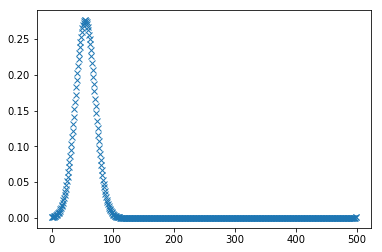

In [2]:
def η(x, t=0.1, κ=3e-6, a=3e-6, x_0=np.pi):
    M = 1; P = 1
    return (M / (P *(4*np.pi*κ*t)**0.5)) * np.exp(-(((x-(x_0 + a*t))**2)/(4*κ*t)))

params = {'L':12.*np.pi,'nx':500,'nt':100}
adv_coef  = {'a':3, 'σ':0.1}
diff_coef = {'κ':3e-3, 'σ':0.1}

Adv  = advection(params,adv_coef)
Adv.U[0,:] = η(Adv.x,0.1,diff_coef['κ'],adv_coef['a'])

Diff = Diffusion(params,diff_coef)
Diff.U[0,:] = η(Adv.x,0.1,diff_coef['κ'],adv_coef['a'])

UStar = np.zeros_like(Diff.U)
U = np.copy(Diff.U)  # numerical sol. array
u = np.copy(Diff.U)  # analytical sol. array

for t in range(params['nt']-1):
    UStar[t,:] = Diff.crank_nicolson(t,U)
    U[t+1,:]   = Adv.BeamWarming(t,UStar)
    
    u[t+1,:] = η(Adv.x,(t*Adv.dt) + 0.1,diff_coef['κ'],adv_coef['a'])

plt.plot(U[-1,:],'x')

In [ ]:
plt.plot(test.x,analytical[-1,:])
plt.plot(test.x,LaxWendroff_S[-1,:])

In [ ]:
########################################################
#################   Init. Constant   ###################
########################################################
a  = 3.                    # wave speed 
L  = 2*np.pi               # Domain Length 
nx = 100                    # Num. grid cells
dx = L/(nx-1)              # grid spacing

nt = 100                     # Num time steps
σ  = .5                    # courant number
dt = 0.001                 # time step 
κ  = 3e-3
########################################################
##################   Init. Domain   ####################
########################################################
x  = np.linspace(dx,L,nx)  # spatial grid
u  = np.zeros((nt,nx)) # (num methods) X (nx) X (nt)
u[0,:] = f(x,0,κ,a)   # init. condition

for j in range(0,nt-1):
    for i in (0,nx-1):
        u[j+1,i] = u[j,i] - ((dt*a)/dx)* (u[j,i] - u[j,i-1])  

In [ ]:
plt.plot(x,initcond(test,t=50))

In [ ]:
import scipy as sp

def Bahar(x,t,a,κ):
    return 0.5 * sp.special.erfc((x-a*t)/np.sqrt(4*κ*t)) + 0.5*np.exp((a*x)/κ)*sp.special.erfc((x+a*t)/np.sqrt(4*κ*t))

x1 = np.linspace(0,100,100+1)
y1 = Bahar(x1,500,0.1,0.02)                                                                                              
                                                                                               

In [ ]:
plt.plot(x1,y1)